# Business Task

```
B: Hi, I'm a businessman and recently we decided to add AI into our project. We have labeled 10k samples for this purpose. Can you train a perfect classifier for my problem?
```

### 1. Train Classifier

In [1]:
import csv

In [2]:
import numpy as np

In [3]:
import sklearn

In [43]:
import matplotlib.pyplot as plt

In [14]:
def file_opener(path, rtype):
    with open(path, rtype) as f:
        csv_arr = f.readlines()
        for row in range(1, len(csv_arr)):
            csv_arr[row] = csv_arr[row].split(',')
            csv_arr[row][0], csv_arr[row][1] = float(csv_arr[row][0]), float(csv_arr[row][1][:-1])
        csv_arr = csv_arr[1:]
    return csv_arr

In [15]:
csv_arr = file_opener("business_proj.csv", "r")

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
model = SGDClassifier(loss='log')

In [18]:
csv_arr = np.array(csv_arr, dtype=float)
x_train = csv_arr[:,0].reshape(csv_arr.shape[0], 1)
y_train = csv_arr[:,1]

In [19]:
print(x_train.shape)

(10000, 1)


In [20]:
model.fit(x_train, y_train)

SGDClassifier(loss='log')

### 2. Classification quality on Validation Data

In [21]:
csv_valid = file_opener("task_test.csv", "r")

In [39]:
import seaborn as sns


def calc_tp(y_true, y_pred) -> int:
    i = 0
    for x in range(len(y_true)):
        if y_pred[x] and y_true[x]:
            i += 1
    return i

def calc_fp(y_true, y_pred) -> int:
    i = 0
    for x in range(len(y_true)):
        if y_pred[x] and (not y_true[x]):
            i += 1
    return i

def calc_tn(y_true, y_pred) -> int:
    i = 0
    for x in range(len(y_true)):
        if (not y_pred[x]) and (not y_true[x]):
            i += 1
    return i

def calc_fn(y_true, y_pred) -> int:
    i = 0
    for x in range(len(y_true)):
        if (not y_pred[x]) and y_true[x]:
            i += 1
    return i

def calc_confusion_matrix(y_true, y_pred) -> np.array:
    arr = np.array([[calc_tn(y_true, y_pred), calc_fp(y_true, y_pred)],
                    [calc_fn(y_true, y_pred), calc_tp(y_true, y_pred)]])
    return arr
    pass
    
def plot_confusion_matrix(y_true, y_pred) -> None:
    ## Calculate confusion matrix first
    cf_matrix = calc_confusion_matrix(y_true, y_pred)
    
    ## Create heatmap
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    

def calc_accuracy(y_true, y_pred) -> float:
    pass


def calc_precision(y_true, y_pred) -> float:
    pass


def calc_recall(y_true, y_pred) -> float:
    pass


def calc_f1_measure(y_true, y_pred) -> float:
    pass

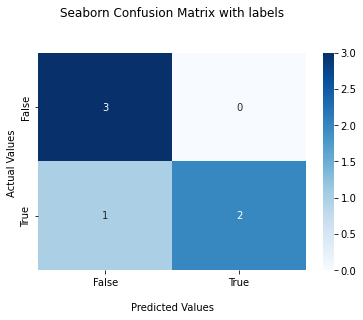

In [45]:
arr1 = np.array([0,1,0,1,1,0])
arr2 = np.array([0,1,0,1,0,0])
assert calc_tp(arr1, arr2) == 2, 'wrong tp'
assert calc_fp(arr1, arr2) == 0, 'wrong fp'
assert calc_tn(arr1, arr2) == 3, 'wrong tn'
assert calc_fn(arr1, arr2) == 1, 'wrong fn'
assert np.all(calc_confusion_matrix(arr1, arr2) == np.array([[3, 0],[1, 2]])), 'wrong confusion matrix'
plot_confusion_matrix(arr1, arr2)

In [49]:
csv_valid = np.array(csv_valid, dtype=float)
y_true = csv_valid[:,1]
x_valid = csv_valid[:,:1]
y_pred = model.predict(x_valid)

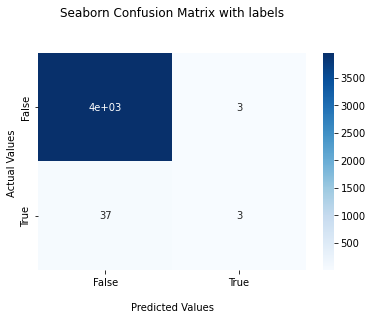

In [50]:
plot_confusion_matrix(y_true, y_pred)